In [61]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [62]:
def convers(Ar,Va):   
    tmp = []
    for A,V in zip(Ar,Va):
        if (A == 0) & (V ==0):
            tmp.append(0)
        if (A == 0) & (V ==1):
            tmp.append(1)
        if (A == 1) & (V ==1):
            tmp.append(2)
        if (A == 1) & (V ==0):
            tmp.append(3)
    return tmp

In [63]:
def two_labal(tensor,L):
    if L == 'Va':
        tensor[tensor==3] = 0
        tensor[tensor==2] = 1
    elif L == 'Ar':
        tensor[tensor==1] = 0
        tensor[tensor==3] = 1
        tensor[tensor==2] = 1
    #print(tensor)
    return tensor

In [187]:
Ar = torch.load('./predict/ALL-MIX_Ar_Cnn6_ALBERT_fold-0.pt')
Va = torch.load('./predict/ALL-Lyrics_Va_BERT_fold-0.pt')

In [188]:
Ar_true = Ar['y_true']
Ar_pred = Ar['y_pred']
Va_true = Va['y_true']
Va_pred = Va['y_pred']
y_true = convers(Ar_true,Va_true)
y_pred = convers(Ar_pred,Va_pred)

In [189]:
f1_score(y_true,y_pred,average='micro')

0.7991631799163179

In [190]:
title = "ALL-Ar_CNN6+ALBERT_Va_BERT-fold0"

In [191]:
confusion_matrix(y_true,y_pred)

array([[87,  4,  1,  6],
       [12, 38,  2,  3],
       [ 1,  2, 27,  5],
       [ 7,  1,  4, 39]])

In [194]:
import numpy as np
GG = np.array([[347,3,17,9],
               [39,5,8,2],
               [43,2,53,9],
               [25,0,8,20]])

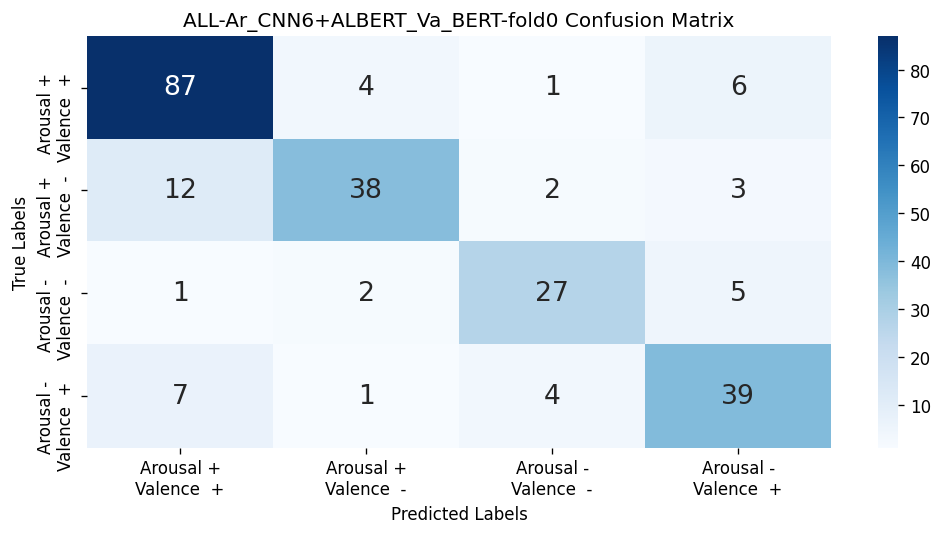

In [195]:
cm = pd.DataFrame(confusion_matrix(y_true,y_pred),index=['Arousal +\nValence  +',
                                    'Arousal +\nValence  -',
                                    'Arousal -\nValence  -',
                                    'Arousal -\nValence  +',]).rename(columns={0: "Arousal +\nValence  +", 
                                                                               1: "Arousal +\nValence  -",
                                                                               2: "Arousal -\nValence  -",
                                                                               3: "Arousal -\nValence  +",}) 
fig = plt.figure(figsize=(10,10),dpi=120)
ax = fig.add_subplot(2,1,1)
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d",annot_kws={'size':16})
ax.set_title('{} Confusion Matrix'.format(title))

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

fig.savefig('png/{}_fold0.png'.format(title),bbox_inches='tight')